<h2>Question 2</h2>
<ul>
    <li>Write a function that can shift an MNIST image in any direction by one pixel.</li>
    <li>For each image in the training set, create four shifted copies and add them to the training set.</li>
    <li>Train your best model on this expanded training set and measure its accuracy on the test set. </li>
</ul>

In [1]:
from scipy.ndimage import shift
from sklearn.datasets import fetch_openml
import matplotlib.pyplot as plt
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
mnist = fetch_openml('mnist_784', version = 1)

# Convert the data to the correct format
X = np.array(mnist["data"], dtype=np.float32)
y = np.array(mnist["target"], dtype=np.int64)

X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [3]:
def shift_image(image, dx, dy):
    image = image.reshape((28, 28))
    shifted_image = shift(image, [dy, dx], cval = 0, mode = "constant")
    return shifted_image.reshape([-1])

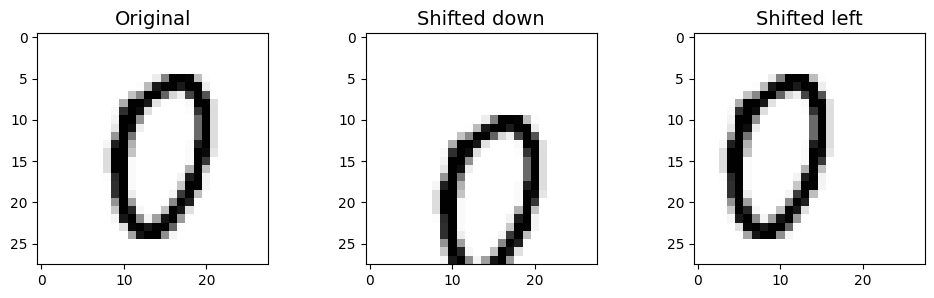

In [4]:
image = X_train[1000]
shifted_image_down = shift_image(image, 0, 5)
shifted_image_left = shift_image(image, -5, 0)

plt.figure(figsize=(12,3))
plt.subplot(131)
plt.title("Original", fontsize=14)
plt.imshow(image.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(132)
plt.title("Shifted down", fontsize=14)
plt.imshow(shifted_image_down.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.subplot(133)
plt.title("Shifted left", fontsize=14)
plt.imshow(shifted_image_left.reshape(28, 28), interpolation="nearest", cmap="Greys")
plt.show()

In [5]:
X_train_augmented = [image for image in X_train]
y_train_augmented = [label for label in y_train]

for dx, dy in ((1, 0), (-1, 0), (0, 1), (0, -1)):
    for image, label in zip(X_train, y_train):
        X_train_augmented.append(shift_image(image, dx, dy))
        y_train_augmented.append(label)

X_train_augmented = np.array(X_train_augmented)
y_train_augmented = np.array(y_train_augmented)

In [6]:
shuffle_idx = np.random.permutation(len(X_train_augmented))
X_train_augmented = X_train_augmented[shuffle_idx]
y_train_augmented = y_train_augmented[shuffle_idx]

In [7]:
knn_clf = KNeighborsClassifier()
param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5]}]

grid_search = GridSearchCV(knn_clf, param_grid, cv=5, verbose=3)
grid_search.fit(X_train, y_train)
knn_clf = KNeighborsClassifier(**grid_search.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END ....n_neighbors=3, weights=uniform;, score=0.972 total time=  34.9s
[CV 2/5] END ....n_neighbors=3, weights=uniform;, score=0.971 total time=  33.9s
[CV 3/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  34.1s
[CV 4/5] END ....n_neighbors=3, weights=uniform;, score=0.969 total time=  34.0s
[CV 5/5] END ....n_neighbors=3, weights=uniform;, score=0.970 total time=  33.9s
[CV 1/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  34.7s
[CV 2/5] END ...n_neighbors=3, weights=distance;, score=0.972 total time=  36.0s
[CV 3/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  35.0s
[CV 4/5] END ...n_neighbors=3, weights=distance;, score=0.970 total time=  34.1s
[CV 5/5] END ...n_neighbors=3, weights=distance;, score=0.971 total time=  34.4s
[CV 1/5] END ....n_neighbors=4, weights=uniform;, score=0.969 total time=  34.0s
[CV 2/5] END ....n_neighbors=4, weights=uniform;,

In [8]:
knn_clf.fit(X_train_augmented, y_train_augmented)

KNeighborsClassifier(n_neighbors=4, weights='distance')

In [9]:
y_pred = knn_clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9763